# **EDA ANALYSIS ON DIABETES DATASET**

**Project Type** :Data Science for Predictive Healthcare Analytics

**Project Prepared by** : Manu Teja

**Domain** : Medical Research

Data Set Provided by PIMA Diabetes
Dataset (UCI)

**Problem Statement :**

Diabetes is a chronic health condition affecting millions globally, yet early detection remains a challenge, leading to severe complications and increased healthcare burdens. This project addresses the critical need for a proactive, data-driven approach to diabetes risk assessment. By leveraging clinical and demographic data, the problem is to identify the most significant predictive factors of diabetes and develop a reliable machine learning model that can accurately stratify individuals based on their risk, enabling timely intervention and improved patient outcomes.

**project summary :**

This project analyzes a diabetes dataset to find the main factors that cause the disease and to build a tool that can predict if someone has it. We used graphs and charts to discover that high blood sugar, high BMI, and older age are the biggest risk factors.The main goal is to help doctors diagnose diabetes earlier by understanding which warning signs to look for first.

**CODING SECTION -**

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [84]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
print("First Five rows of Dataset\n")
df.head()

Mounted at /content/drive
First Five rows of Dataset



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


READING DATASET

In [85]:
# copying the dataset for cleaning
df_clean=df.copy()
print(df_clean.columns.tolist)
print("Dataset shape: ",df_clean.shape)

<bound method IndexOpsMixin.tolist of Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')>
Dataset shape:  (768, 9)


INFO OF ROWS & COLUMNS

In [86]:
print("Number of rows: ",df_clean.shape[0])
print("Number of columns: ",df_clean.shape[1])

Number of rows:  768
Number of columns:  9


DATASET INFO

In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


CHECKING DUPLICATE VALUES

In [88]:
df_clean.duplicated().sum()

np.int64(0)

NULL VALUES

In [89]:
df_clean.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


RENAMING THE COLUMNS

In [90]:
df_clean.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


VISUALISING MISSING VALUES

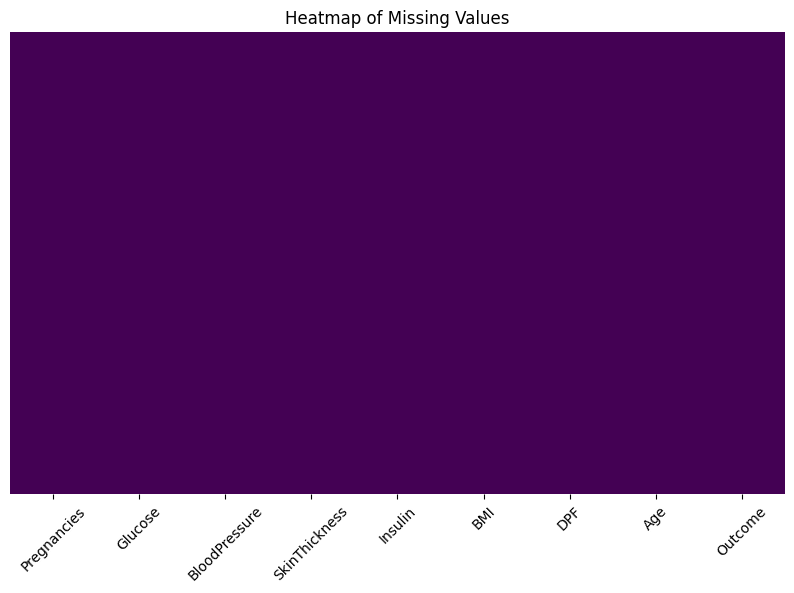

In [91]:
#visualising heatmap of missing values
plt.figure(figsize=(10,6))
ax=sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax.tick_params(axis='x', rotation=45)
plt.title('Heatmap of Missing Values')
plt.show()

UNDERSTANDING DATASET VARIABLES

In [92]:
print("Columns present in dataset")
print(df_clean.columns)
print("\n Data types of columns")
print(df_clean.dtypes)

Columns present in dataset
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

 Data types of columns
Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object


STATISTIC MEASUREMENTS OF DATASET

In [93]:
print("Statistical measures of dataset")
df_clean.describe()

Statistical measures of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


CHECKING UNIQUE VALUES IN COLUMNS OF DATASET

In [94]:
print("Unique values in dataset")
df_clean.nunique()

Unique values in dataset


,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DPF,517
Age,52
Outcome,2


DATA WRAGLING

REMOVING THE DUPLICATE VALUES

In [95]:
print("checking for duplicated rows\n")
print("no.of exact duplicated rows : ",df.duplicated().sum())

df=df.drop_duplicates()
print("shape of dataset after removing duplicates:",df.shape)

checking for duplicated rows

no.of exact duplicated rows :  0
shape of dataset after removing duplicates: (768, 9)


HANDLING MISSING VALUES

In [96]:
print("Handling missing values..\n")

numeric_cols=df_clean.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df_clean[col].isnull().sum() >0:
        median_value=df_clean[col].median()
        df_clean[col]=df_clean[col].fillna(median_value)
        null_count=df_clean[col].isnull().sum()
        print(f"Filled {null_count} missing values in {col} with {median_value}")

#for categorical columns
categorical_col=df_clean.select_dtypes(include='object').columns
for col in categorical_col:
    if df_clean[col].isnull().sum() >0:
        mode_val=df_clean[col].mode()[0]
        null_count=df_clean[col].isnull().sum()
        df_clean[col]=df_clean[col].fillna(mode_val)
        print(f"Filled {null_count} rows of {col} with {mode_val}")
print("Missing values left :",df_clean.isnull().sum().sum())


Handling missing values..

Missing values left : 0


DETECT AND TREAT OUTLIERS

In [97]:
print("Detecting and treating outliers..\n")
numeric_cols=df_clean.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    Q1=df_clean[col].quantile(0.25)
    Q3=df_clean[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    median_value=df_clean[col].median()
    df_clean[col]=np.where((df_clean[col]<lower_bound)|(df_clean[col]>upper_bound),median_value,df_clean[col])

Detecting and treating outliers..



ENCODING CATEGORICAL VALUES

In [98]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    float64
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    float64
 8   Outcome        768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


As In our Dataset there is no categorical values so we no need to do perform this task on our dataset

FEATURE ENGINEERING

In [99]:
# creating new feature using existing features
#creating Glucose category feature
df_clean["Glucose_Category"] = pd.cut(
    df_clean["Glucose"],
    bins=[0, 139, 199, 300],
    labels=["Normal", "Prediabetic", "Diabetic"]
)

#creating BMI category feature
df_clean["BMI_Category"] = pd.cut(
    df_clean["BMI"],
    bins=[0, 18.4, 24.9, 30],
    labels=["Underweight", "Normal", "Overweight"]
)

#creating age_group feature
df_clean["Age_Group"] = pd.cut(
    df_clean['Age']*(df_clean['Age'].max()-df_clean['Age'].min())+df_clean['Age'].min(),
    bins=[0,40,55,100],labels=["Young","Middle-aged","Senior"]
)

#one hot encoding to created new features
df_clean = pd.get_dummies(df_clean, columns=["Glucose_Category", "BMI_Category","Age_Group"],drop_first=False)

NEW DATASET ROWS

In [100]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Glucose_Category_Normal,Glucose_Category_Prediabetic,Glucose_Category_Diabetic,BMI_Category_Underweight,BMI_Category_Normal,BMI_Category_Overweight,Age_Group_Young,Age_Group_Middle-aged,Age_Group_Senior
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,1.0,False,True,False,False,False,False,False,False,False
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0.0,True,False,False,False,False,True,False,False,False
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1.0,False,True,False,False,True,False,False,False,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,0.0,True,False,False,False,False,True,False,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,0.3725,33.0,1.0,True,False,False,False,False,False,False,False,False


TARGET DISTRIBUTION

In [101]:
df_clean['Outcome'].value_counts()

,count
Outcome,
0.0,500
1.0,268


SCATTER PLOTS

In [102]:
import plotly.io as pio

# If you are in Jupyter Notebook
pio.renderers.default = "notebook_connected"

# If you are in JupyterLab
# pio.renderers.default = "iframe_connected"

# If none works, fallback to static image
# pio.renderers.default = "svg"


In [103]:
import plotly.express as px
fig = px.scatter(df_clean, x="Age", y="Glucose", color="Outcome",color_continuous_scale="Viridis" )
fig.update_layout(width=1000,height=500)
fig.update_layout(title="Age vs Glucose Scatterplot", xaxis_title="Age", yaxis_title="Glucose")
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    plot_bgcolor='white', # Clean white background
    font=dict(size=12),
    title_x=0.5 # Center the title
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

Based on the scatterplot, there is no clear correlation between Age and Glucose levels in this dataset. The data points appear randomly distributed without any discernible upward or downward trend. Glucose values are concentrated across all age groups without significant clustering. The outcome variable (likely diabetes diagnosis) shows mixed results throughout the age and glucose ranges. This suggests that while both are risk factors, their relationship alone doesn't strongly predict the outcome pattern shown.

In [104]:
fig=px.scatter(df_clean,x='Pregnancies',y='Glucose',color='Outcome',color_continuous_scale='Viridis')
fig.update_layout(width=1000,height=500)
fig.update_layout(title="Pregnancies vs Glucose Scatterplot",xaxis_title="Pregnancies",yaxis_title="Glucose")
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=12),
    title_x=0.5
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

Based on the displayed axes, this scatterplot appears to show a weak positive correlation between the number of pregnancies and glucose levels. The concentration of higher glucose values seems to increase slightly with more pregnancies, suggesting gestation may influence glucose metabolism. However, the relationship is not strongly deterministic, as high glucose values are present across all pregnancy counts. This pattern indicates that while pregnancies may be a contributing factor, it is not the sole predictor of elevated glucose levels.

In [105]:
import plotly.express as px

fig = px.scatter(df,
                 x='Glucose',
                 y='BMI',
                 color='Outcome',
                 title='Core Relationship: Glucose Level vs. BMI (Colored by Diabetes Outcome)',
                 trendline="lowess",
                 labels={"Glucose": "Glucose Level (mg/dL)", "BMI": "Body Mass Index"},
                 hover_data=['Age', 'Pregnancies', 'BloodPressure']
                )
fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=12),
    title_x=0.5
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

This scatterplot reveals a critical clinical relationship: higher glucose levels strongly correlate with diabetes diagnosis (colored points). The data shows a positive trend where elevated BMI often coincides with hyperglycemia, particularly in diabetic cases. Notably, diabetic outcomes cluster prominently in the high-glucose quadrant, regardless of BMI. Non-diabetic cases predominantly occupy the normal glucose range across all BMI values. This visualization confirms glucose level as a primary biomarker, with BMI serving as a significant compounding risk factor for diabetes.

In [106]:
fig = px.scatter(df,
                 x='Glucose',
                 y='BMI',
                 size='Age',
                 color='Outcome',
                 hover_name='Pregnancies',
                 size_max=15,
                 title='Multi-Dimensional Analysis: Glucose, BMI, Age, and Outcome',
                 labels={"Glucose": "Glucose Level (mg/dL)", "BMI": "Body Mass Index"}
                )
fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=12),
    title_x=0.5
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

This chart shows that high sugar levels in the blood are the biggest sign of diabetes. People with high sugar levels are almost always diagnosed (colored points). Heavier weight also plays a role, especially when combined with high sugar. You can see that older people (larger dots) in the high-sugar area almost always have diabetes. The main takeaway is that controlling blood sugar is the most important goal, while managing weight and age are also important factors.



In [107]:
df_clean['Age_Group_Combined'] = 'Young'
df_clean.loc[df_clean['Age_Group_Middle-aged'], 'Age_Group_Combined'] = 'Middle-aged'
df_clean.loc[df_clean['Age_Group_Senior'], 'Age_Group_Combined'] = 'Senior'

fig = px.scatter(df_clean,
                 x="BloodPressure",
                 y="SkinThickness",
                 animation_frame="Age_Group_Combined",
                 color="Outcome",
                 range_x=[df_clean['BloodPressure'].min()-5, df_clean['BloodPressure'].max()+5],
                 range_y=[0, df_clean['SkinThickness'].max()+5],
                 title="Blood Pressure vs. Skin Thickness by Age Group and Outcome"
                )
fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=12),
    title_x=0.5
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

This plot reveals a weak positive correlation between blood pressure and skin thickness across all age groups. Diabetic outcomes (colored points) are dispersed throughout the data without forming distinct clusters based on these two variables. The widespread scatter indicates that blood pressure and skin thickness alone are poor predictors of diabetes diagnosis. The relationship appears consistent across different age cohorts, suggesting these factors are not age-dependent indicators. This analysis suggests focusing on stronger predictors like glucose rather than these specific metrics.



In [108]:
bmi_category_conditions = [
    df_clean['BMI_Category_Underweight'],
    df_clean['BMI_Category_Normal'],
    df_clean['BMI_Category_Overweight']
]
bmi_category_choices = ['Underweight', 'Normal', 'Overweight']
df_clean['BMI_Category'] = np.select(bmi_category_conditions, bmi_category_choices, default='Unknown')

fig = px.scatter(df_clean,
                 x='Glucose',
                 y='BloodPressure',
                 color='Outcome',
                 facet_col='BMI_Category',
                 title='Glucose vs. Blood Pressure, Stratified by BMI Category',
                 labels={"Glucose": "Glucose Level (mg/dL)", "BloodPressure": "Blood Pressure (mm Hg)"}
                )
fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=12),
    title_x=0.5
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.show()

This stratified analysis shows that the relationship between glucose and blood pressure remains consistently weak across all BMI categories. There is no clear, strong correlation visible in any weight group—underweight, normal, or overweight. Diabetic outcomes are present at all levels of blood pressure, indicating it is not a primary distinguishing factor. The plot confirms that high glucose levels, not blood pressure, are the dominant predictor of diabetes, regardless of a patient's weight category. This suggests clinical focus should remain on glucose management over blood pressure for diabetes prediction.

BOX PLOTS

In [109]:
fig1 = px.box(df_clean,
             x='Outcome',
             y='Glucose',
             color='Outcome',
             title='<b>Glucose Level Distribution: Diabetes vs Non-Diabetes</b><br><sup>The Primary Diagnostic Differentiator</sup>',
             labels={'Outcome': 'Diabetes Diagnosis (0 = No, 1 = Yes)', 'Glucose': 'Glucose Level (mg/dL)'},
             category_orders={'Outcome': [0, 1]},
             color_discrete_map={0: '#1f77b4', 1: '#d62728'},  # Blue for healthy, red for diabetic
             notched=True  # Adds confidence intervals around the median
            )
fig1.update_layout(showlegend=False, plot_bgcolor='white')
fig1.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig1.show()

This chart shows a very clear difference: people with diabetes have much higher sugar levels in their blood than people without diabetes. The boxes don't even overlap much, which proves that checking sugar levels is a very reliable way to diagnose diabetes. The higher and wider box for the diabetic group means they not only have higher average sugar levels, but also more variation from person to person. This graph confirms that the blood sugar test is an excellent and trusted tool for doctors to identify diabetes.

In [110]:
fig2 = px.box(df_clean,
             x='Outcome',
             y='BMI',
             color='Outcome',
             title='<b>BMI Distribution by Diabetes Diagnosis</b><br><sup>Assessing Obesity as a Major Risk Factor</sup>',
             labels={'Outcome': 'Diabetes Diagnosis', 'BMI': 'Body Mass Index'},
             category_orders={'Outcome': [0, 1]},
             color_discrete_map={0: '#1f77b4', 1: '#d62728'},
             notched=True
            )
fig2.update_layout(showlegend=False, plot_bgcolor='white')
fig2.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig2.show()

This chart shows that people with diabetes tend to be heavier, with a higher average BMI, than people without diabetes. The weight among diabetic patients is also much more varied, with some being very heavy and others closer to normal. This proves that being overweight is a major risk factor for developing diabetes. The clear difference between the two groups shows why managing your weight is a key part of both preventing and treating this disease.



In [111]:
fig3 = px.box(df_clean,
             x='Outcome',
             y='Age',
             color='Outcome',
             title='<b>Age Distribution by Diabetes Diagnosis</b><br><sup>Understanding Age-Related Risk Patterns</sup>',
             labels={'Outcome': 'Diabetes Diagnosis', 'Age': 'Age (years)'},
             category_orders={'Outcome': [0, 1]},
             color_discrete_map={0: '#1f77b4', 1: '#d62728'},
             notched=True
            )
fig3.update_layout(showlegend=False, plot_bgcolor='white')
fig3.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig3.show()

This chart shows that older people are much more likely to have diabetes than younger people. The average age of people with diabetes is noticeably higher than those without the disease. Getting older is a known risk factor for developing diabetes, and this graph proves that pattern is true in this group. Because age is something we can't change, it highlights why doctors focus on screening older patients for diabetes. Finding it early in this higher-risk group is very important for their health.

BAR GRAPH

In [112]:
df_clean["Pregnancy_Group"] = pd.cut(
    df_clean["Pregnancies"],
    bins=[-1, 2, 5, 10, df["Pregnancies"].max()],
    labels=["0–2", "3–5", "6–10", "10+"]
)

fig2 = px.bar(
    df_clean.groupby("Pregnancy_Group")["Outcome"].mean().reset_index(),
    x="Pregnancy_Group",
    y="Outcome",
    title="Diabetes Outcome Rate by Pregnancy Count Groups",
    labels={"Outcome": "Proportion with Diabetes", "Pregnancy_Group": "Pregnancy Groups"}
)
fig2.show()


This chart shows that the more pregnancies a woman has, the higher her chance of getting diabetes. The risk starts to go up noticeably for women who have had 6 or more pregnancies. Women with 10 or more pregnancies have the highest risk of all. This suggests that having many babies might slowly change the body's metabolism in a way that makes diabetes more likely. Because of this, women who have had several pregnancies should be especially careful to get checked for diabetes.

HEAT MAP

In [113]:
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
corr_matrix = df_clean[numerical_columns].corr()
fig = px.imshow(corr_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='RdBu_r',
                title='<b>Correlation Matrix of Clinical Variables</b><br><sup>Relationships Between Numerical Features</sup>',
                zmin=-1,
                zmax=1
               )
fig.update_layout(width=700, height=600)
fig.show()

This chart shows that high blood sugar and high BMI are the two strongest signs linked to having diabetes. Older age and more pregnancies also increase the risk, but not as strongly. Surprisingly, insulin levels and skin thickness don't show a strong direct link to diabetes in this analysis. Since most factors don't overlap much, each one tells doctors something unique, meaning they should look at all of them together to get the full picture.